# EDB: plot nets with Matplotlib

This example shows how to use the ``Edb`` class to view nets, layers and
via geometry directly in Python. The methods demonstrated in this example
rely on
[matplotlib](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png).

## Perform required imports

Perform required imports, which includes importing a section.

In [1]:
import tempfile

import pyedb
from pyedb.misc.downloads import download_file

## Download the EDB and copy it into the temporary folder.

In [2]:
temp_dir = tempfile.TemporaryDirectory(suffix=".ansys")
targetfolder = download_file("edb/ANSYS-HSD_V1.aedb", destination=temp_dir.name)

## Create an instance of the Electronics Database using the `pyedb.Edb` class.

> Note that units are SI.

In [3]:
# Select EDB version (change it manually if needed, e.g. "2025.1")
edb_version = "2025.2"
print(f"EDB version: {edb_version}")

edb = pyedb.Edb(edbpath=targetfolder, edbversion=edb_version)

EDB version: 2025.2


C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\misc\decorators.py:55: UserWarning: Argument `edbversion` is deprecated for method `Edb`; use `version` instead.
  warnings.warn(
C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\generic\design_types.py:301: UserWarning: Your ANSYS AEDT version is eligible to gRPC version.You might consider switching to that version for better user experience.For more information please check this link: https://edb.docs.pyansys.com/version/dev/grpc_api/index.html
  warnings.warn(GRPC_GENERAL_WARNING, UserWarning)


PyEDB INFO: Star initializing Edb 10:24:26.689746


PyEDB INFO: Edb version 2025.2


PyEDB INFO: Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


PyEDB INFO: legacy v0.67.1


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyEDB INFO: Database ANSYS-HSD_V1.aedb Opened in 2025.2


PyEDB INFO: Cell main Opened


PyEDB INFO: Builder was initialized.


PyEDB INFO: open_edb completed in 9.0434 seconds.


PyEDB INFO: EDB initialization completed in 9.1069 seconds.


Display the nets on a layer. You can display the net geometry directly in Python using
``matplotlib`` from the ``pyedb.Edb`` class.

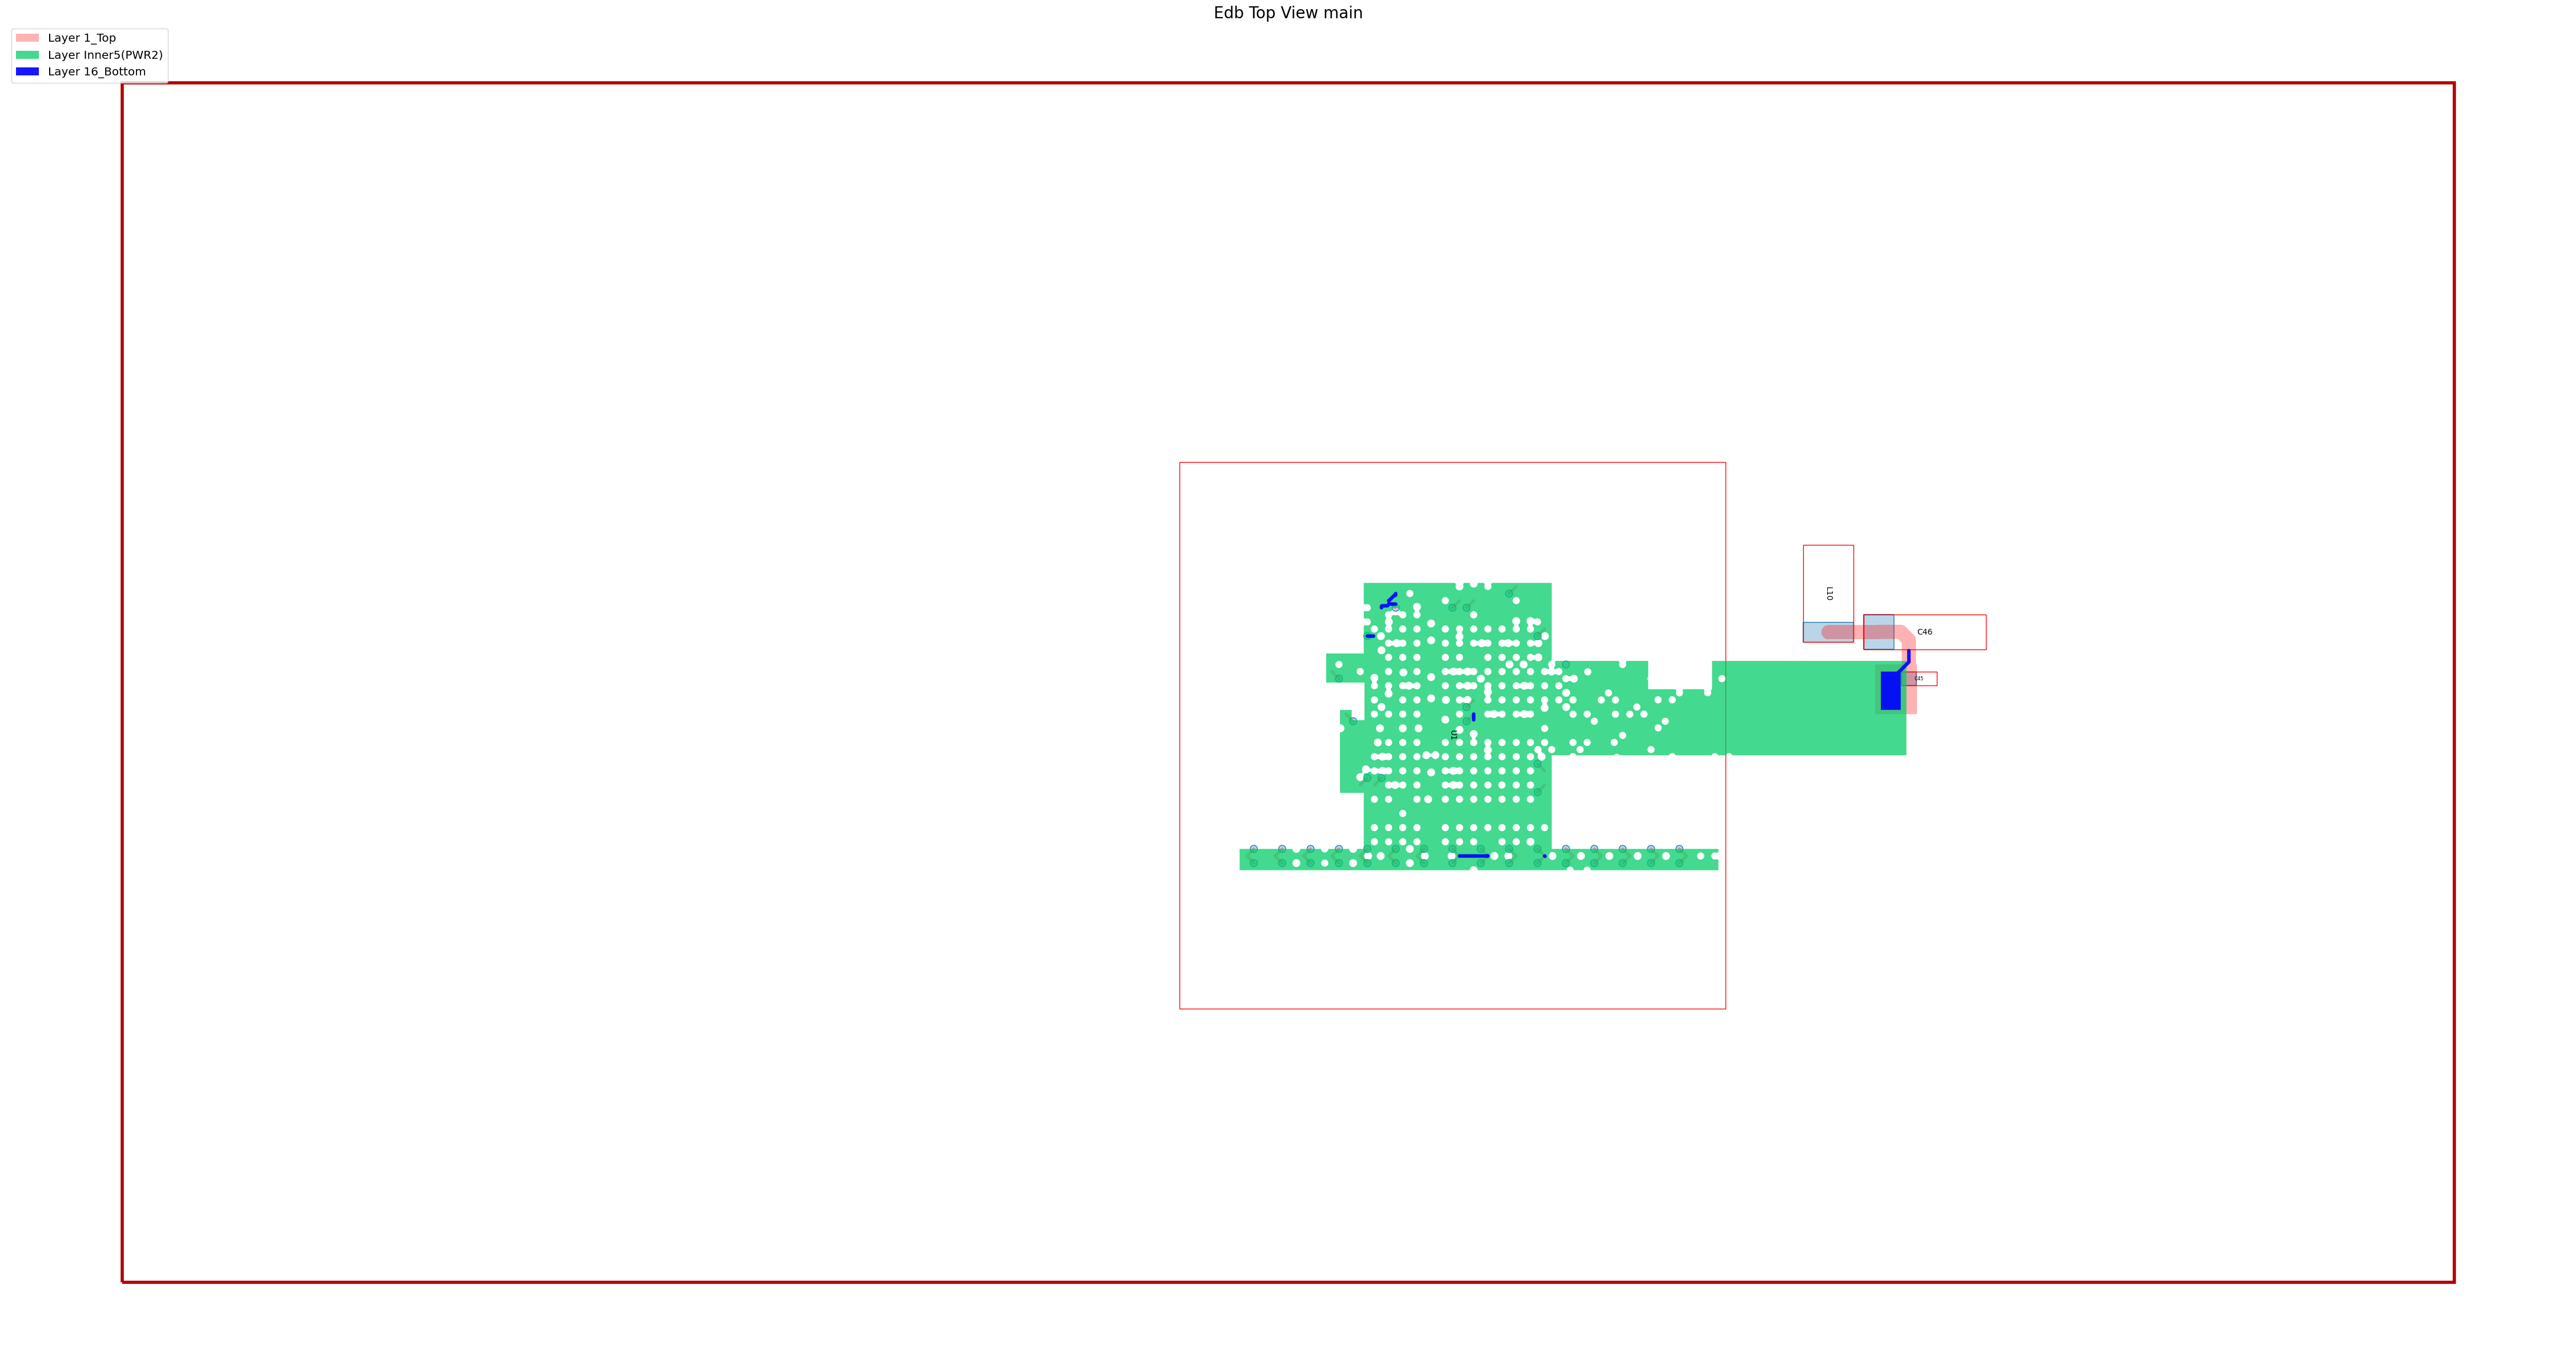

PyEDB INFO: Plot Generation time 4.249


(<Figure size 6000x3000 with 1 Axes>,
 <Axes: title={'center': 'Edb Top View main'}>)

In [4]:
edb.nets.plot("AVCC_1V3")

You can view multiple nets by passing a list containing the net
names to the ``plot()`` method.

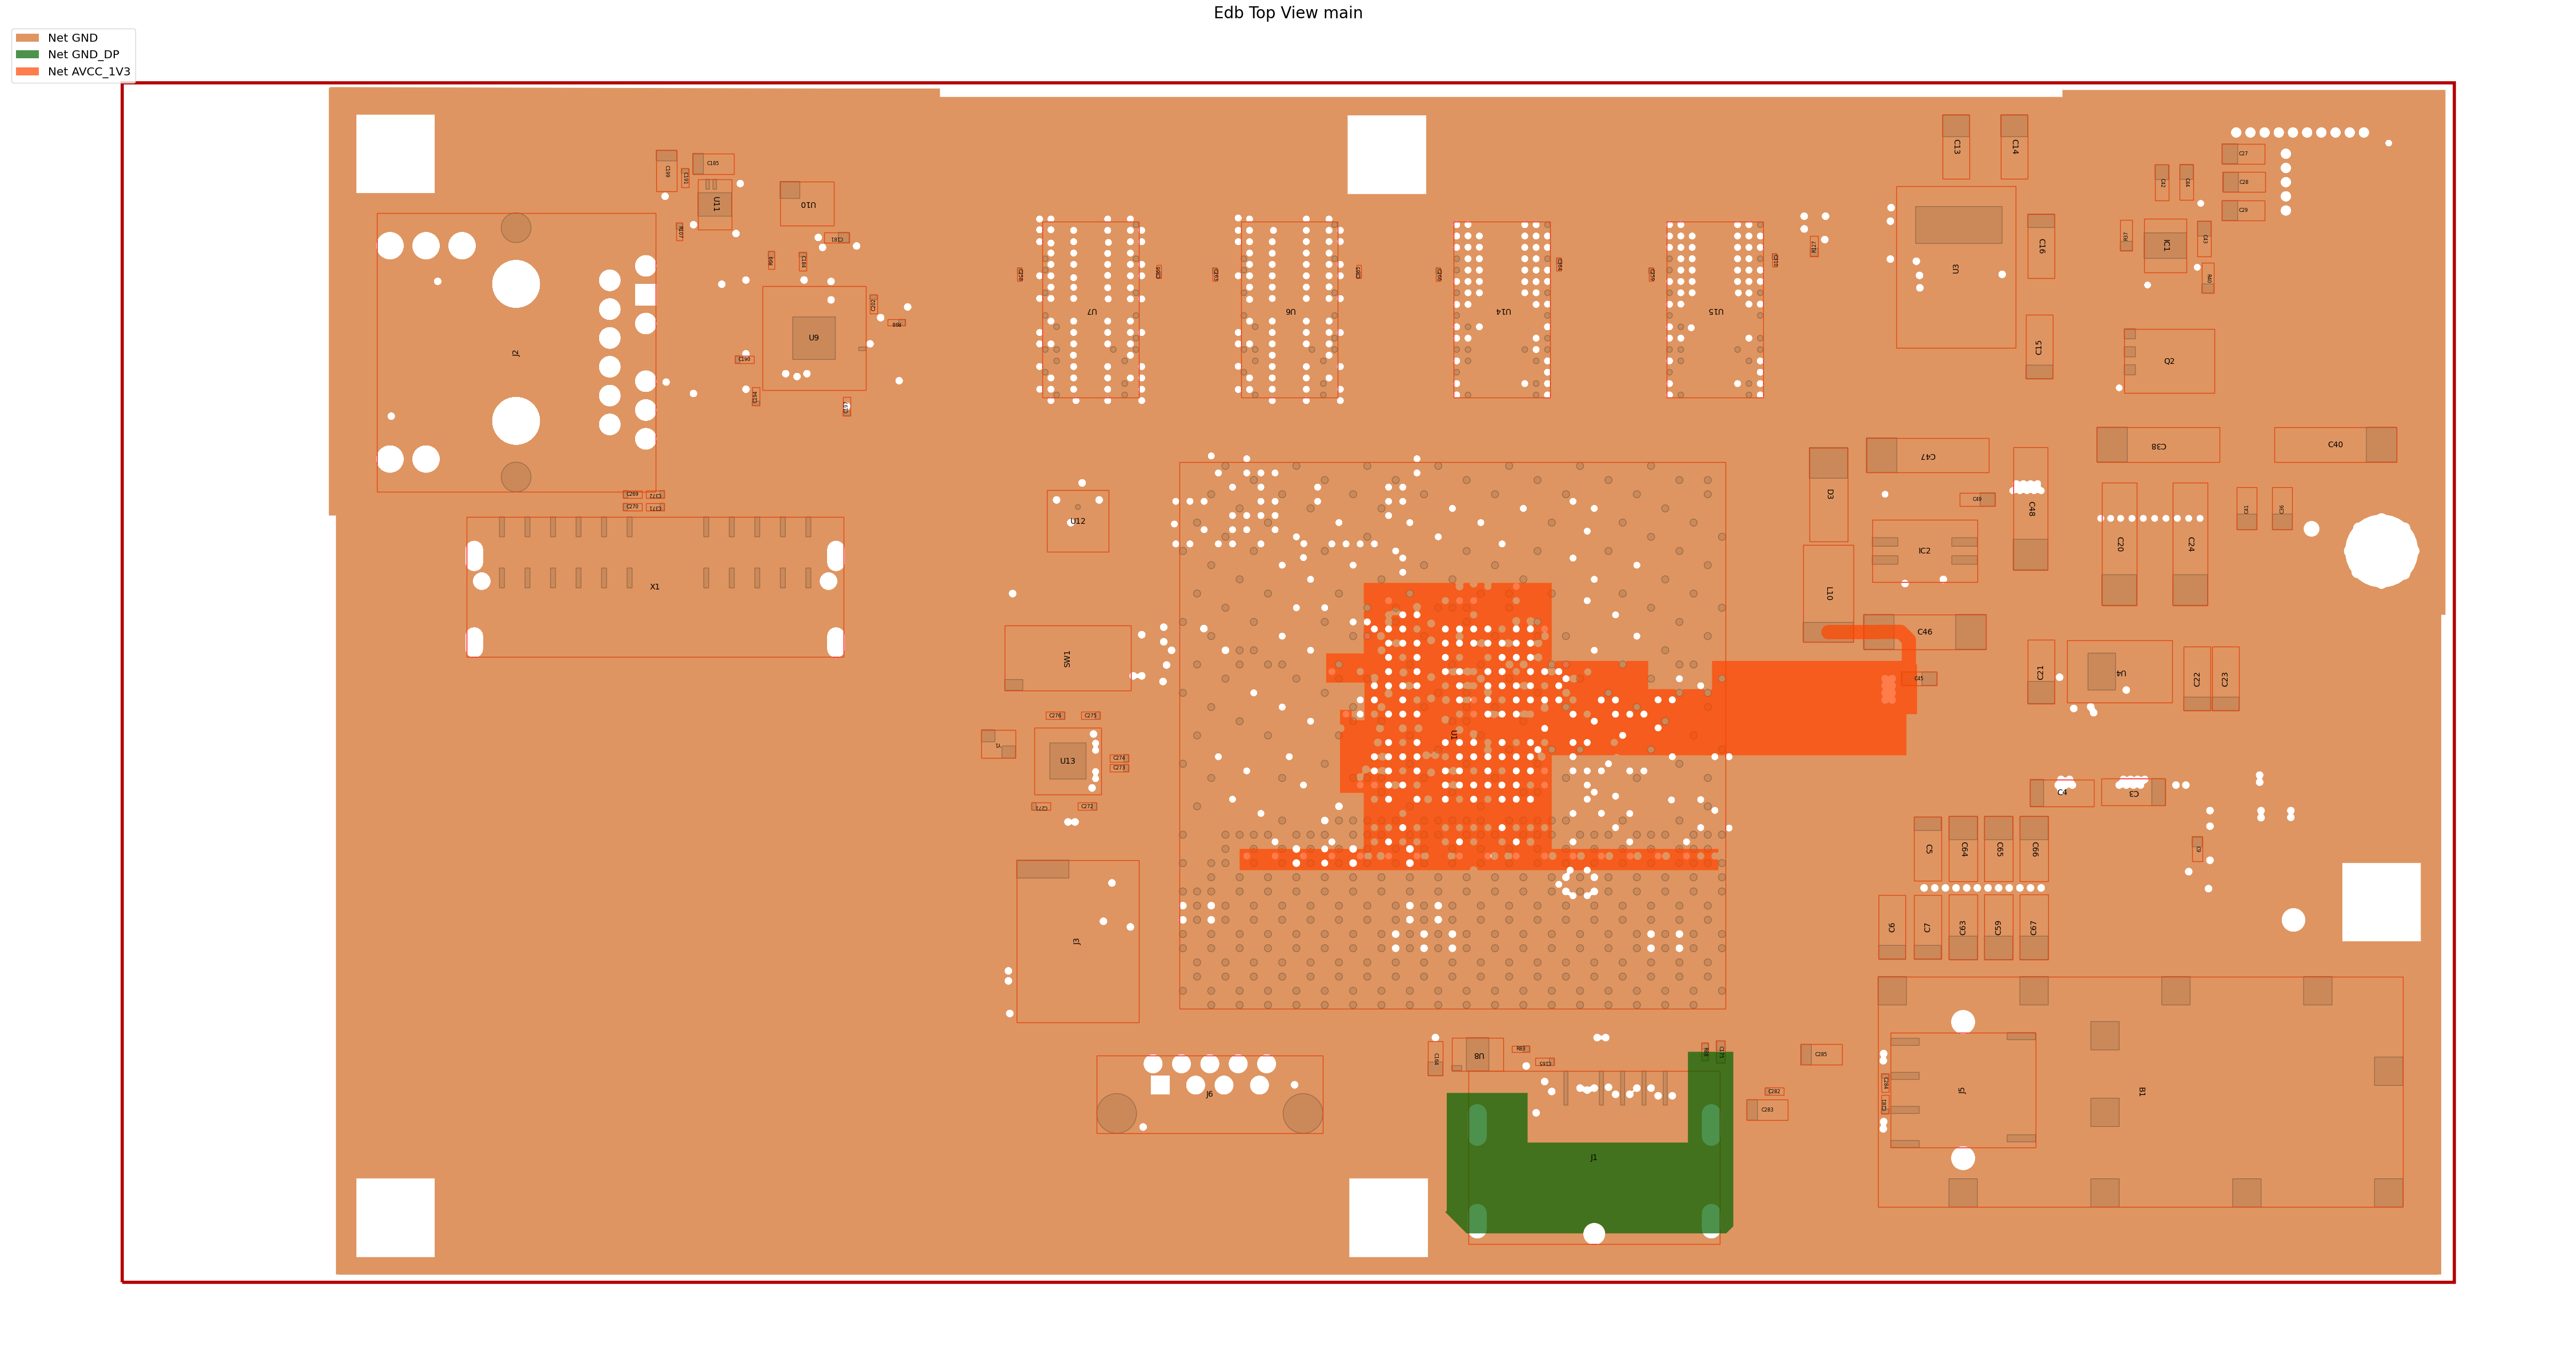

PyEDB INFO: Plot Generation time 7.442


(<Figure size 6000x3000 with 1 Axes>,
 <Axes: title={'center': 'Edb Top View main'}>)

In [5]:
edb.nets.plot(["GND", "GND_DP", "AVCC_1V3"], color_by_net=True)

You can display all copper on a single layer by passing ``None``
as the first argument. The second argument is a list
of layers to plot. In this case, only one
layer is to be displayed.

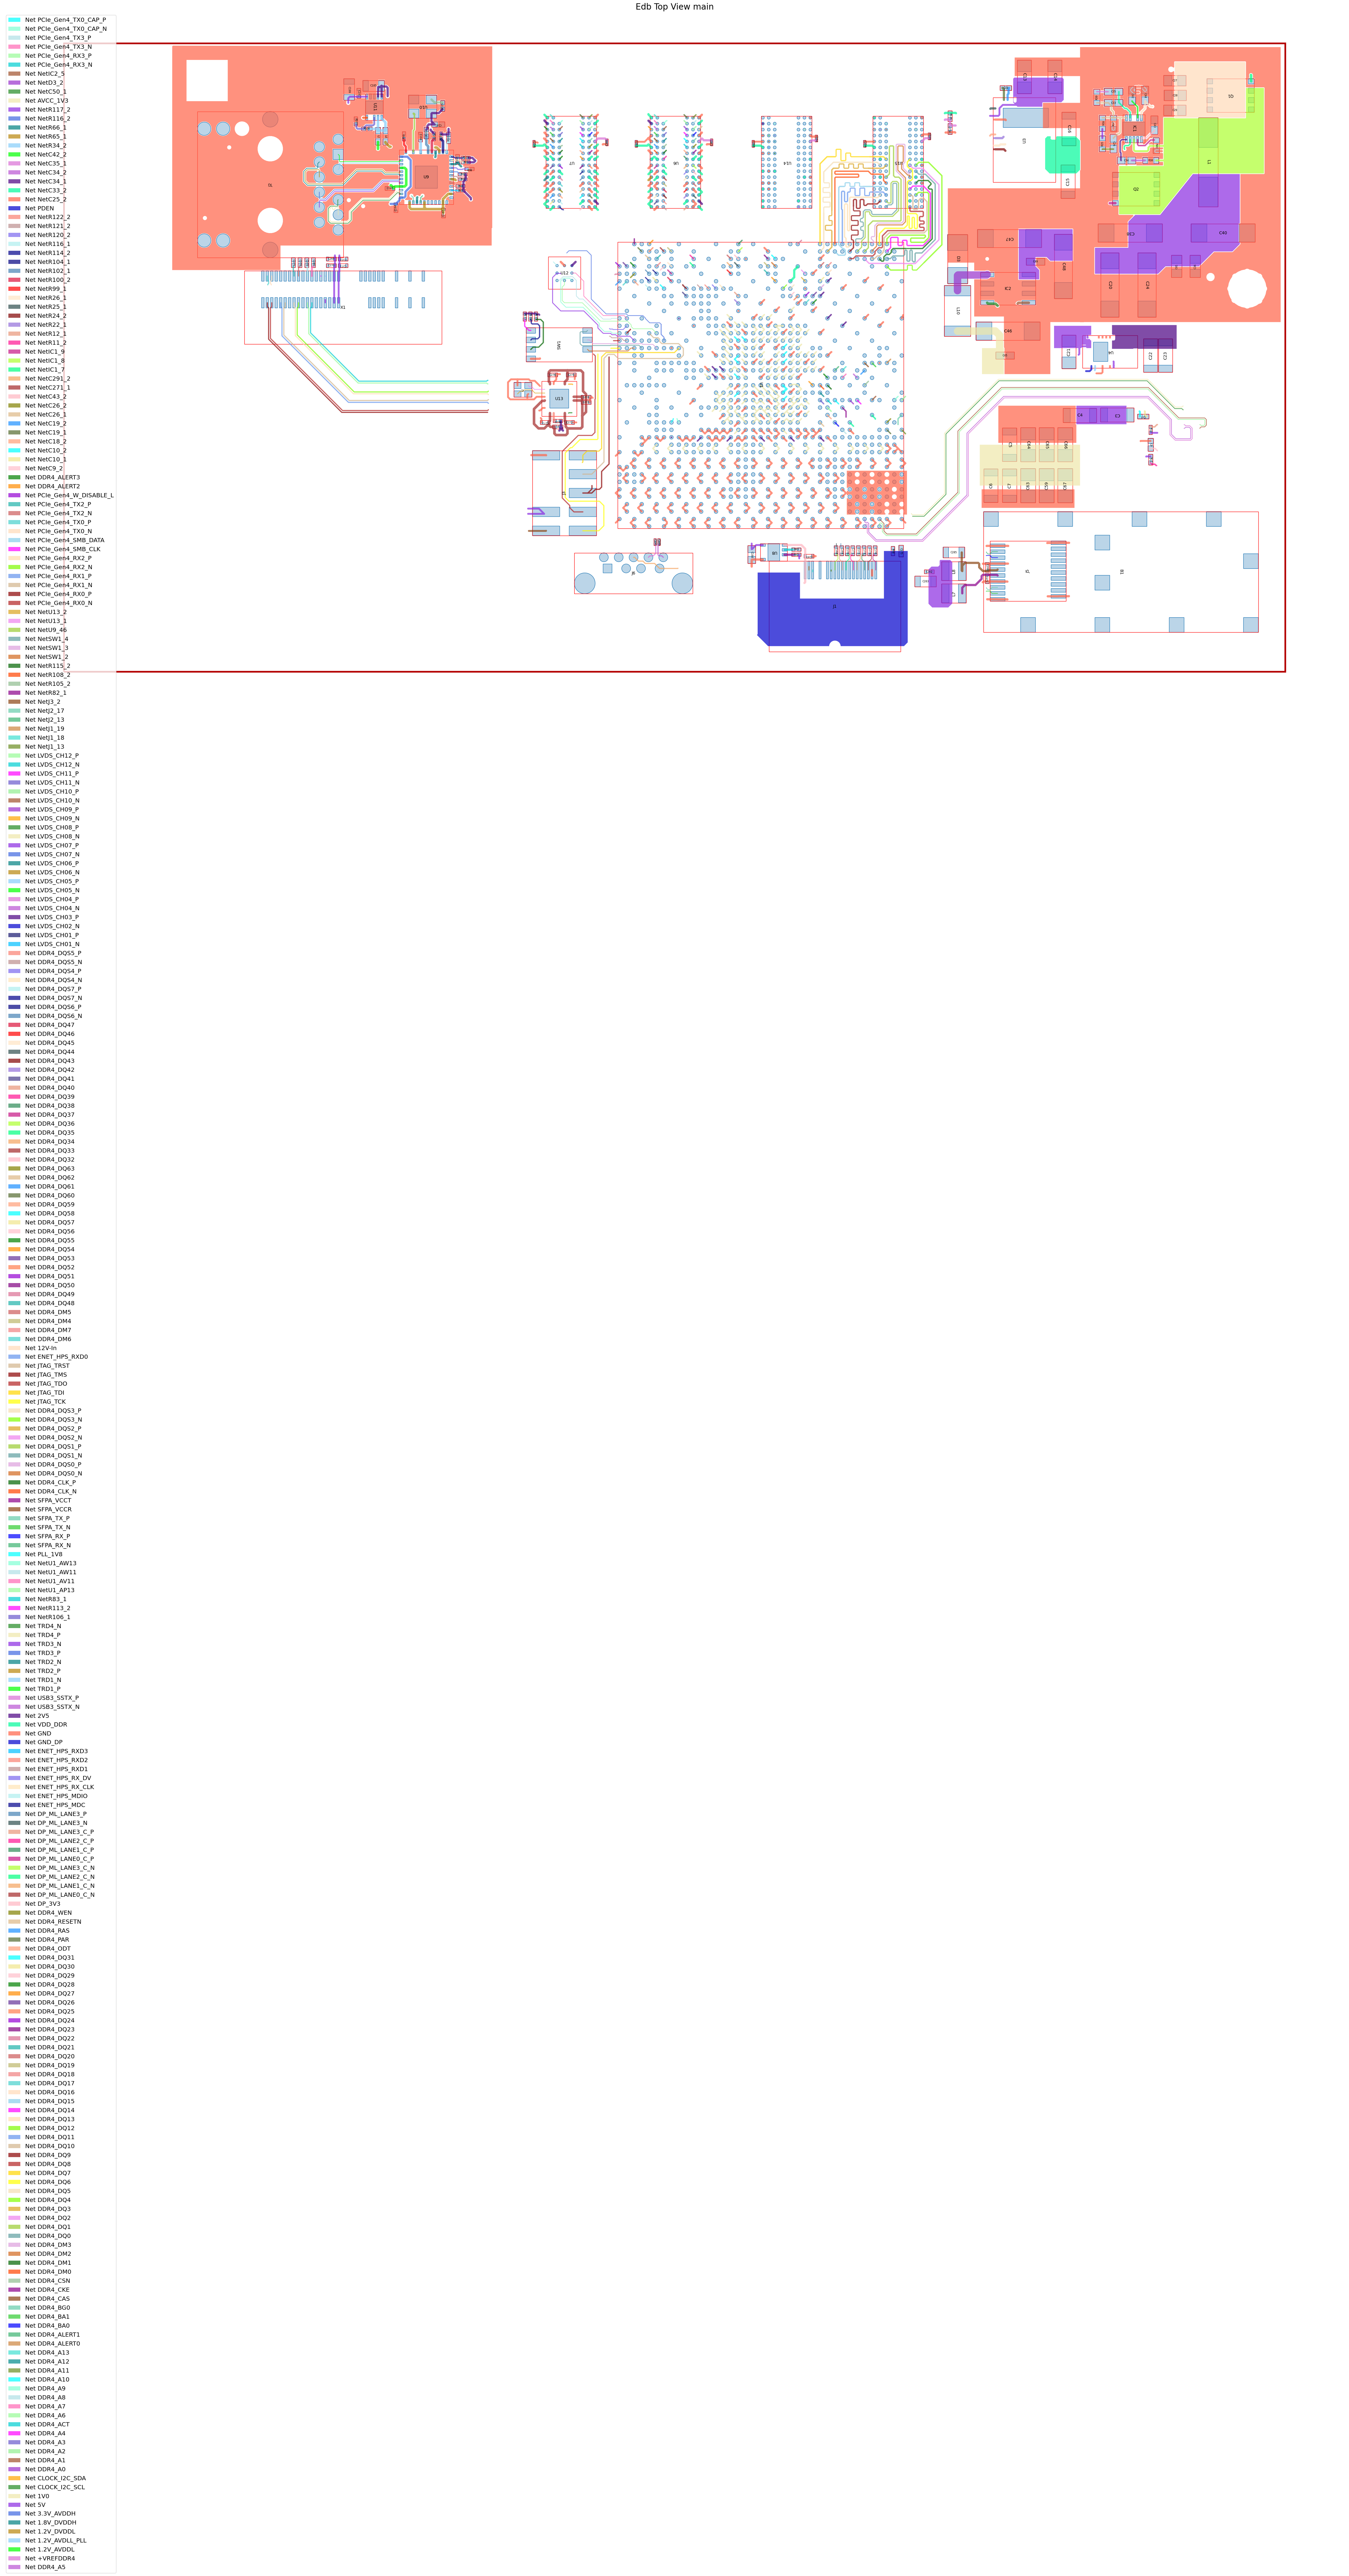

PyEDB INFO: Plot Generation time 19.963


(<Figure size 6000x3000 with 1 Axes>,
 <Axes: title={'center': 'Edb Top View main'}>)

In [6]:
edb.nets.plot(None, ["1_Top"], color_by_net=True, plot_components_on_top=True)

Display a side view of the layers and padstack geometry using the
``Edb.stackup.plot()`` method.

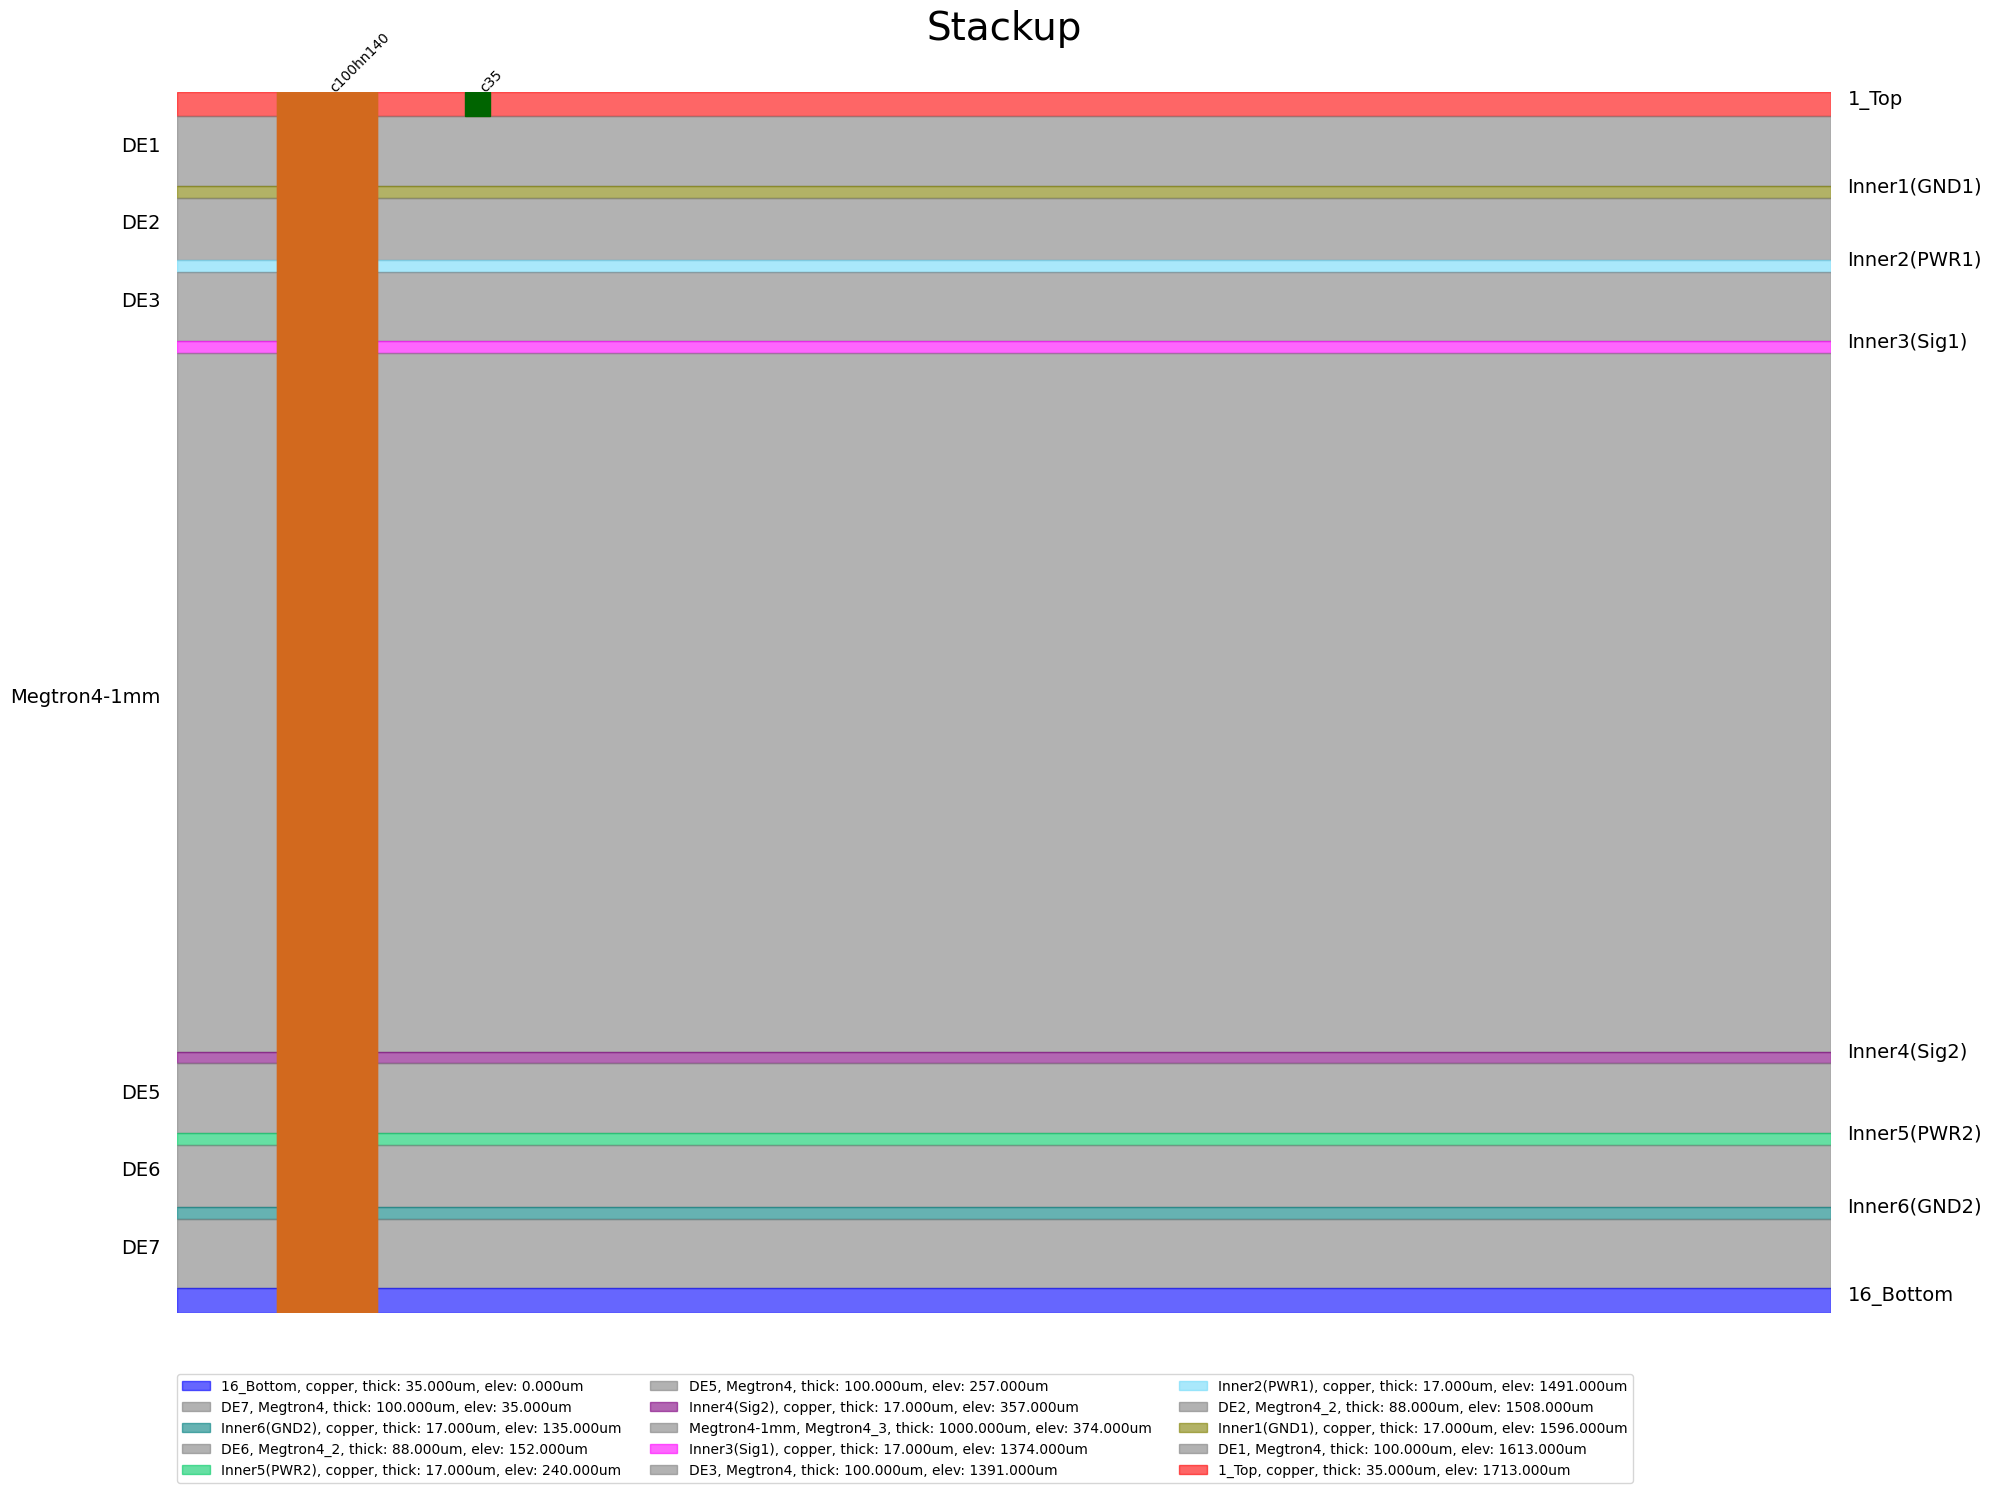

<module 'matplotlib.pyplot' from 'C:\\actions-runner\\_work\\pyaedt-examples\\pyaedt-examples\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
edb.stackup.plot(scale_elevation=False, plot_definitions=["c100hn140", "c35"])

## Creating coaxial port on component U1 and all ddr4_dqs nets
Selecting all nets from ddr4_dqs and component U1 and create coaxial ports
On corresponding pins.

In [8]:
comp_u1 = edb.components.instances["U1"]
signal_nets = [net for net in comp_u1.nets if "ddr4_dqs" in net.lower()]
edb.hfss.create_coax_port_on_component("U1", net_list=signal_nets)
edb.components.set_solder_ball(component="U1", sball_diam="0.3mm", sball_height="0.3mm")

True

## Renaming all ports
Renaming all port with _renamed string as suffix example.

In [9]:
for port_name, port in edb.ports.items():
    port.name = f"{port_name}_renamed"

Close the EDB.

In [10]:
edb.close_edb()

PyEDB INFO: Close Edb file completed in 0.1585 seconds.


True

Remove all files and the temporary directory.

In [11]:
temp_dir.cleanup()